## classification
* 개체의 profile 과 분류값 (label)이 존재
* supervised learning의 한가지

In [1]:
from sklearn.datasets import load_iris 
iris_dataset = load_iris()

**붓꽃 데이터 세트**

In [4]:
print iris_dataset['DESCR']

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [7]:
# iris 데이터 셋 정보들 (keys)
print iris_dataset.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']


In [8]:
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'],
      dtype='|S10')

In [9]:
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
iris_dataset['data'].shape

(150, 4)

In [12]:
iris_dataset['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [41]:
# 훈련세트와 테스트 세트의 분리! 기계학습의 기본 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=0)

In [14]:
x_train.shape,x_test.shape

((112, 4), (38, 4))

In [15]:
y_train.shape, y_test.shape

((112,), (38,))

In [16]:
%matplotlib inline

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
df = pd.DataFrame(x_train,columns=iris_dataset['feature_names'])

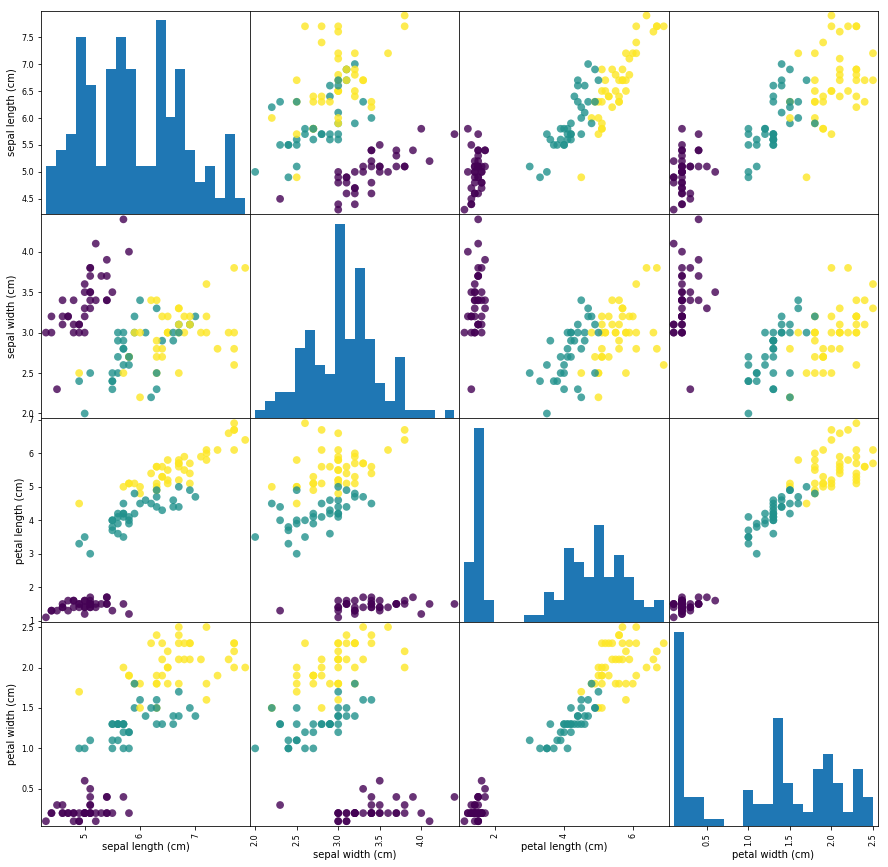

In [21]:
pd.plotting.scatter_matrix(df, c=y_train, figsize=(15,15), marker='o',hist_kwds={'bins':20},s=60,alpha=0.8)
plt.show()

## k-nearest neighbors KNN 분류기
* 훈련데이터를 저장
* 테스트데이터를 훈련데이터에 빗대어 보았을때 총 k 개의 최근접 이웃을 찾고 그 중 높은 빈도의 label로 예측

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [42]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [43]:
prediction = knn.predict(x_test)

In [44]:
y_test == prediction

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False], dtype=bool)

In [45]:
knn.score(x_test,y_test) # accuracy 

0.97368421052631582

---

**유방암 데이터 세트**

In [28]:
from sklearn.datasets import load_breast_cancer

In [29]:
cancer = load_breast_cancer()

In [30]:
cancer.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [31]:
print cancer['DESCR']

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [34]:
cancer['data'].shape, cancer['target'].shape

((569, 30), (569,))

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(cancer['data'],cancer['target'],random_state=0)

In [51]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.91608391608391604

In [52]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.90209790209790208

In [53]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.92307692307692313

In [54]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.92307692307692313

In [63]:
acc_test = []
acc_train = []
for k in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    acc_test.append(knn.score(x_test,y_test))
    acc_train.append(knn.score(x_train,y_train))

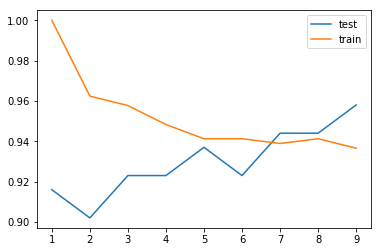

In [66]:
## training accuracy 가 과하게 높고 testing accuracy 가 낮으면 과적합, 너무 낮아도 과소적합 
plt.plot(range(1,10),acc_test,label='test')
plt.plot(range(1,10),acc_train,label='train')
plt.legend()

## Regression

* supervised learning 
* 개체에 대한 profile과 관찰값 (실수형 label)이 존재 

In [69]:
from sklearn.datasets import load_diabetes

In [70]:
diabetes = load_diabetes()

In [73]:
print diabetes['DESCR']

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

In [74]:
# 선형회귀 및 최소 제곱법
# (실제값 - 예측값)^2 값이 최소가 되도록 유도
from sklearn.linear_model import LinearRegression 

In [75]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(diabetes['data'],diabetes['target'],random_state=0)

In [76]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [77]:
lr.score(x_train,y_train) # training accuracy

0.55543714893530205

In [79]:
lr.score(x_test,y_test) # test accuracy

0.35940090989715556

In [85]:
## 선형회귀 Ridge 회귀
## 가중치 강제 압박 알고리즘 존재(regularization) L2 규제법 (그런게 있나보다~)
## 과적합 방지를 위한 조치 
from sklearn.linear_model import Ridge

In [82]:
rg = Ridge()
rg.fit(x_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [83]:
rg.score(x_train,y_train) # training accuracy

0.46254396224959249

In [84]:
rg.score(x_test,y_test)

0.35695757658096805

In [93]:
acc_train = []
acc_test = []
for a in np.arange(0.01,10,0.01):
    rg = Ridge(alpha=a)
    rg.fit(x_train,y_train)
    acc_train.append(rg.score(x_train,y_train))
    acc_test.append(rg.score(x_test,y_test))

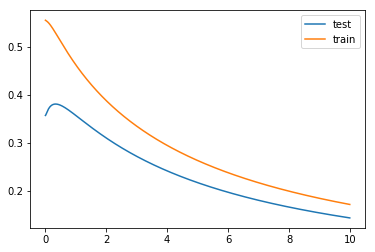

In [94]:
## training accuracy 가 과하게 높고 testing accuracy 가 낮으면 과적합, 너무 낮아도 과소적합 
plt.plot(np.arange(0.01,10,0.01),acc_test,label='test')
plt.plot(np.arange(0.01,10,0.01),acc_train,label='train')
plt.legend()

In [102]:
## 선형회귀 LASSO 
## 가중치를 0으로 만들려 하는 알고리즘, regularization L1 규제법 (그런게 있구나..)
## 정말 가중치를 0로 만들어버린다. 
## 별볼일 없는 특성은 무시한다. 
## Feature selection !!! 
from sklearn.linear_model import Lasso

In [96]:
ls = Lasso()

In [97]:
ls.fit(x_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [98]:
ls.score(x_train,y_train)

0.41412544493966108

In [99]:
ls.score(x_test,y_test)

0.27817828862078764

In [107]:
acc_train = []
acc_test = []
for a in np.arange(0.0001,1,0.0001):
    ls = Lasso(alpha=a)
    ls.fit(x_train,y_train)
    acc_train.append(ls.score(x_train,y_train))
    acc_test.append(ls.score(x_test,y_test))

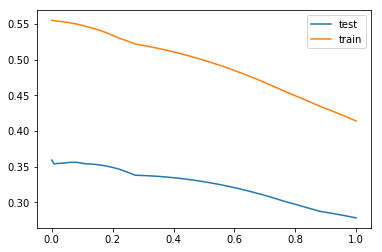

In [108]:
## training accuracy 가 과하게 높고 testing accuracy 가 낮으면 과적합, 너무 낮아도 과소적합 
plt.plot(np.arange(0.0001,1,0.0001),acc_test,label='test')
plt.plot(np.arange(0.0001,1,0.0001),acc_train,label='train')
plt.legend()

## 분류용 선형모델 

[참고자료](http://karlrosaen.com/ml/notebooks/logistic-regression-why-sigmoid/)

* 결정경계
* 훈련된 함수가 경계선 역할을 한다.
![](http://jun.hansung.ac.kr/ML/Exercises/figures/fig2-2.png)
* sigmoid 함수
![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/320px-Logistic-curve.svg.png)

In [109]:
cancer = load_breast_cancer()

In [110]:
cancer.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [112]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0,

In [113]:
x_train, x_test, y_train, y_test = train_test_split(cancer['data'],cancer['target'],random_state=0)

In [114]:
df = pd.DataFrame(x_train,columns=cancer['feature_names'])

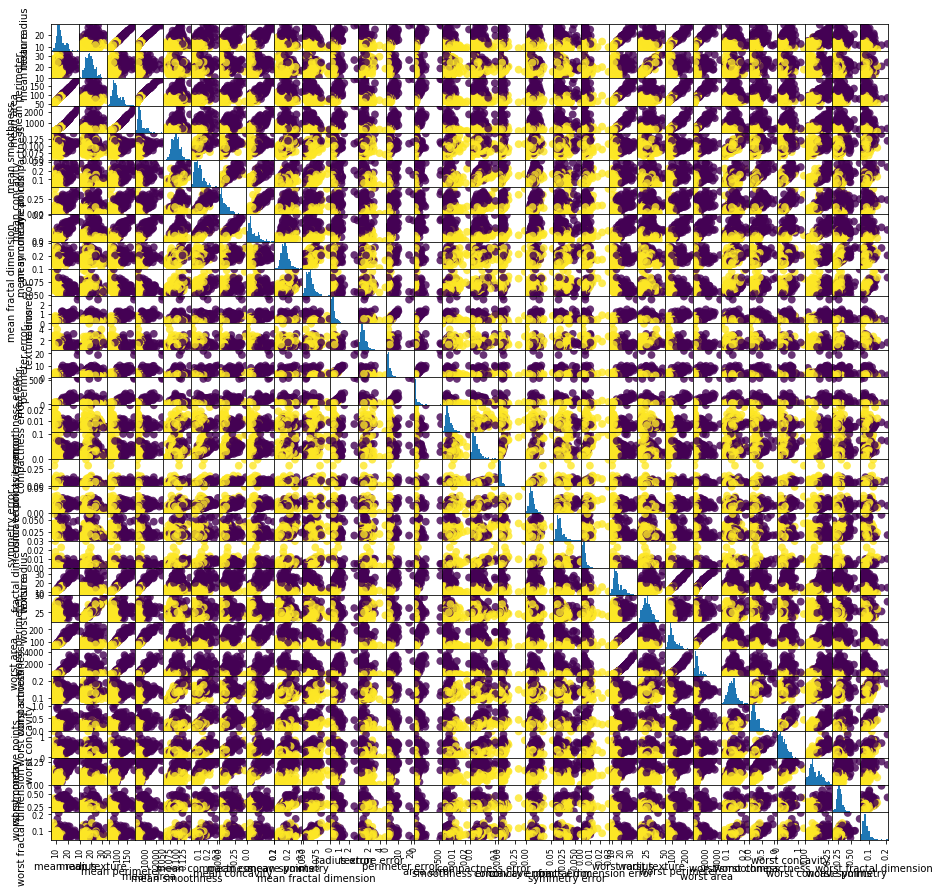

In [115]:
pd.plotting.scatter_matrix(df, c=y_train, figsize=(15,15), marker='o',hist_kwds={'bins':20},s=60,alpha=0.8)
plt.show()

In [116]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [117]:
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [118]:
lr.score(x_train,y_train)

0.960093896713615

In [119]:
lr.score(x_test,y_test)

0.95804195804195802

In [126]:
acc_train = []
acc_test = []
for a in np.arange(1,100,0.1):
    lr = LogisticRegression(C=a)
    lr.fit(x_train,y_train)
    acc_train.append(lr.score(x_train,y_train))
    acc_test.append(lr.score(x_test,y_test))

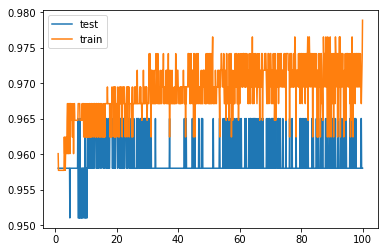

In [127]:
## training accuracy 가 과하게 높고 testing accuracy 가 낮으면 과적합, 너무 낮아도 과소적합 
plt.plot(np.arange(1,100,0.1),acc_test,label='test')
plt.plot(np.arange(1,100,0.1),acc_train,label='train')
plt.legend()

In [120]:
from sklearn.svm import LinearSVC
ls = LinearSVC()
ls.fit(x_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [121]:
ls.score(x_train,y_train)

0.93427230046948362

In [122]:
ls.score(x_test,y_test)

0.91608391608391604

In [130]:
acc_train = []
acc_test = []
for a in np.arange(1,10,0.1):
    ls = LinearSVC(C=a)
    ls.fit(x_train,y_train)
    acc_train.append(ls.score(x_train,y_train))
    acc_test.append(ls.score(x_test,y_test))

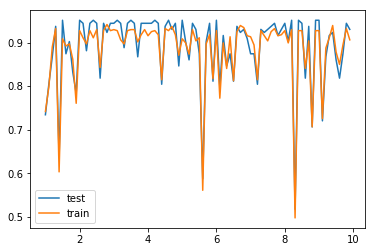

In [131]:
## training accuracy 가 과하게 높고 testing accuracy 가 낮으면 과적합, 너무 낮아도 과소적합 
plt.plot(np.arange(1,10,0.1),acc_test,label='test')
plt.plot(np.arange(1,10,0.1),acc_train,label='train')
plt.legend()

In [132]:
np.argmax(acc_test)

5

In [133]:
acc_test[5],acc_train[5]

(0.95104895104895104, 0.90845070422535212)

In [134]:
np.argmax(acc_train)

18

In [135]:
acc_test[18],acc_train[18]

(0.92307692307692313, 0.94131455399061037)

In [138]:
C = np.arange(1,10,0.1)[18]
ls = LinearSVC(C=C)
ls.fit(x_train,y_train)

LinearSVC(C=2.8000000000000016, class_weight=None, dual=True,
     fit_intercept=True, intercept_scaling=1, loss='squared_hinge',
     max_iter=1000, multi_class='ovr', penalty='l2', random_state=None,
     tol=0.0001, verbose=0)

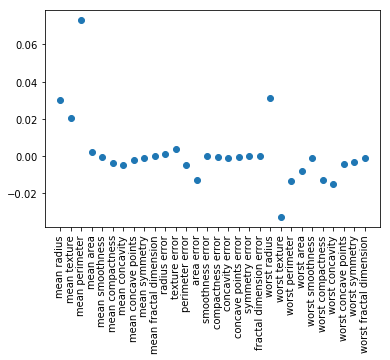

In [149]:
# 각각의 특성 (feature) 에 어떤 가중치를 주었는지를 알아보자 
# label 분류에 큰 영향을 주는 특성을 확인할 수 있다. 
plt.plot(ls.coef_.T,'o',label='C=1')
plt.xticks(range(cancer['data'].shape[1]),cancer['feature_names'],rotation=90)
plt.show()

## 결정트리 


![](http://cfile1.uf.tistory.com/image/244377355359169E26CE51)

![](https://tensorflowkorea.files.wordpress.com/2017/06/2-33.png?w=625)

In [151]:
from sklearn.tree import DecisionTreeClassifier

In [152]:
cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(cancer['data'],cancer['target'],random_state=0)

In [169]:
dt = DecisionTreeClassifier()

In [170]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [171]:
dt.score(x_train,y_train)

1.0

In [172]:
dt.score(x_test,y_test)

0.88811188811188813

In [173]:
acc_train = []
acc_test = []
# max_depth를 통해 가지치기 가능 , 너무 좁은 시각으로 갈 가능성이 높다. 
for a in np.arange(2,10):
    dt = DecisionTreeClassifier(max_depth=a)
    dt.fit(x_train,y_train)
    acc_train.append(dt.score(x_train,y_train))
    acc_test.append(dt.score(x_test,y_test))

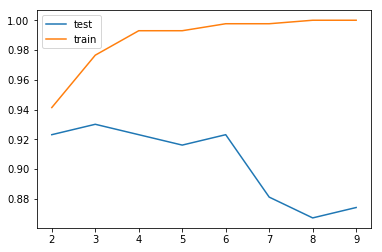

In [175]:
## training accuracy 가 과하게 높고 testing accuracy 가 낮으면 과적합, 너무 낮아도 과소적합 
plt.plot(np.arange(2,10),acc_test,label='test')
plt.plot(np.arange(2,10),acc_train,label='train')
plt.legend()

In [181]:
import graphviz
from IPython.core.display import Image, display

In [184]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [186]:
from sklearn.tree import export_graphviz
export_graphviz(dt,out_file="dt.dot",class_names=cancer['target_names'],feature_names=cancer['feature_names'])

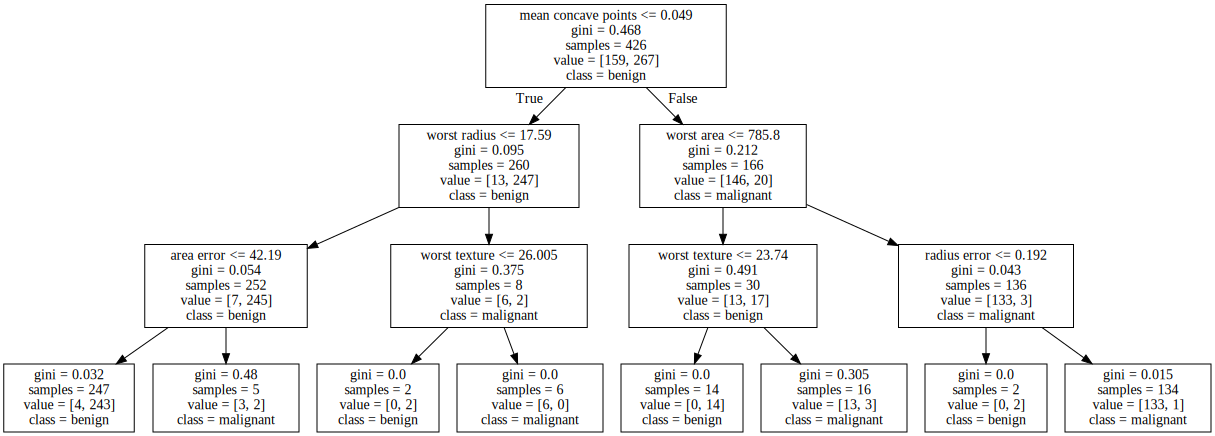

In [187]:
with open('dt.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

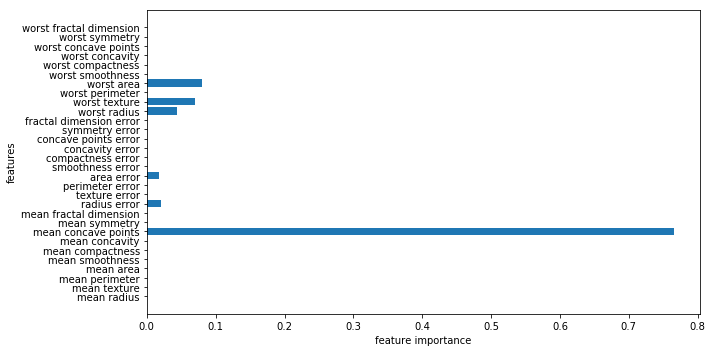

In [194]:
plt.figure(figsize=(10,5))
n_features = cancer.data.shape[1]
plt.barh(range(n_features),dt.feature_importances_,align='center')
plt.yticks(range(n_features),cancer['feature_names'])
plt.xlabel('feature importance')
plt.ylabel('features')
plt.tight_layout()
plt.show()

In [195]:
# random forest
## 다양하게 결정트리를 만들고 이를 평균낸다. 
## 과적합을 매우 효과적으로 방지한다. (트리기반 예측이 과적합률이 높음.)
## 다양한 트리를 만드는 전략
### random feature selection
### random data selection 


In [196]:
from sklearn.datasets import make_moons

In [197]:
X,y = make_moons(n_samples=100,noise=0.25,random_state=3)

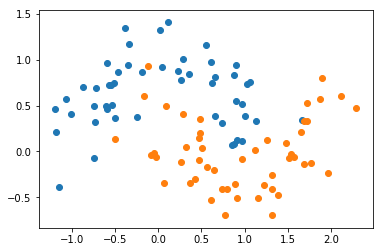

In [206]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

In [207]:
x_train, x_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [209]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=5,random_state=2)

In [210]:
forest.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

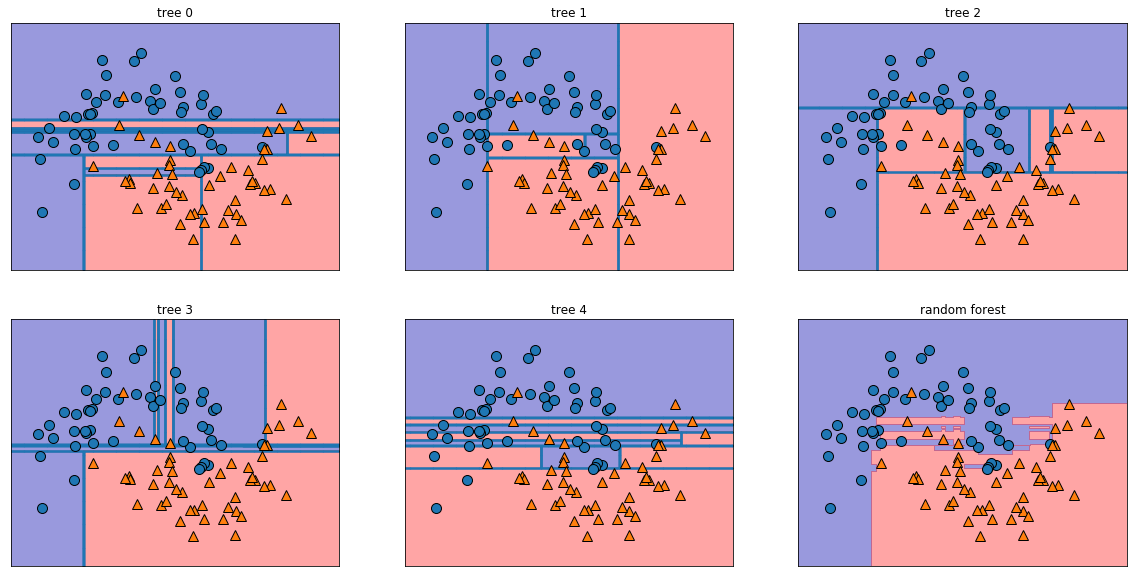

In [216]:
import mglearn
fig, axes = plt.subplots(2,3,figsize=(20,10))
for i, (ax,tree) in enumerate(zip(axes.ravel(),forest.estimators_)):
    ax.set_title('tree %d'%i)
    mglearn.plots.plot_tree_partition(X,y,tree,ax=ax)

mglearn.plots.plot_2d_separator(forest,X,fill=True,ax=axes[-1,-1],alpha=0.4)
axes[-1,-1].set_title('random forest')
mglearn.discrete_scatter(X[:,0],X[:,1],y)

In [217]:
cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(cancer['data'],cancer['target'],random_state=0)

In [218]:
forest = RandomForestClassifier(n_estimators=100,random_state=0)
forest.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [219]:
forest.score(x_train,y_train)

1.0

In [220]:
forest.score(x_test,y_test)

0.97202797202797198

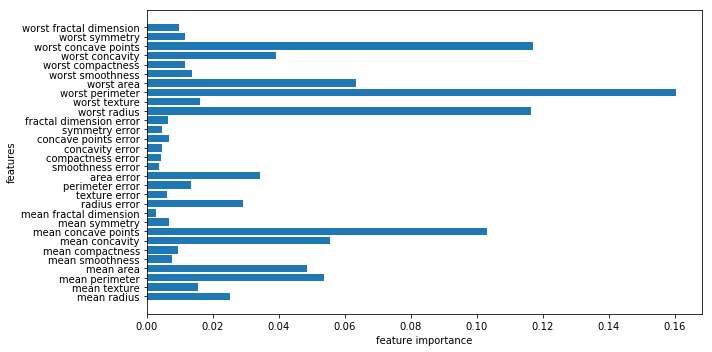

In [221]:
plt.figure(figsize=(10,5))
n_features = cancer.data.shape[1]
plt.barh(range(n_features),forest.feature_importances_,align='center')
plt.yticks(range(n_features),cancer['feature_names'])
plt.xlabel('feature importance')
plt.ylabel('features')
plt.tight_layout()
plt.show()